<h1><center>Homework 3</center></h1>

<h3>Submission Instructions</h3>
<p>
For submission, you only need to submit your Jupyter Notebook file named "StudentName_ID.ipynb"

If you have any questions, you can contact me via kamard@itu.edu.tr
</p>

<h3> Homework Instructions </h3>

<p>In this homework, you will implement Girvan-Newman algorithm, and use the algorithm to decompose the network into a number of modules so that it has the highest modularity. Remember the steps of Girvan-Newman algorithm from Graph Theory Blink 9.3:

<ol>
  <li>Calculate the betweenness centrality of each edge in graph G</li>
  <li>Remove the edge with the highest betweenness centrality. Choose randomly in case same score occurs.</li>
  <li>Recalculate the betweenness centrality of all remaining edges</li>
  <li>Repeat steps 2 and 3 until no edges remain. </li>
</ol>

You will need to modify the above steps so that you find the number of connected components that has the highest modularity. To do that, you can calculate modularity each time new connected component is formed during the Girvan-Newman algorithm, and find the decomposition with highest modularity. Don't forget to compute the modularity of the initial network, as network might not consist any modules 

<h2>WHAT YOU NEED TO DO</h2>
<ol>
    <li> Read and visualize the given graph adjacency matrix files. Give brief comments about the networks' hiearchy and modularity <b>(20p)</b>
    <li> Implement the Girvan-Newman algorithm: Write a function that uses Girvan-Newman algorithm to find the number of connected components that gives the highest modularity. In the same function or another function, return the new graph with the number of connected components you have found (basically, remove edges until the number of connected components are equal to the one you found with your algorithm). <b>(60p)</b>
    <li>Apply the function on the given networks. Visualize the final results. Assign different colors to each node in the visualization. <b>(10p)</b>
    <li> What conclusions can you derive about the networks after you run the algorithm on them and visualize the final result? Give brief comments. <b>(10p)</b>
    <li><b>BONUS</b> What are the key differences between Agglomerative Clustering and Divisive Clustering? Which one of these does the Girvan-Newman algorithm belong to? Explain.<b>(3p)</b> 

Below, I have given you some basic functions to start with. 
</p>

In [4]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import random

You can use RandomGraph function to create a random graph that returns the graph as both networkx.Graph and adjacency matrix as numpy.array.

(Optional, will not affect your grade) You can modify the VisualiseGraph function to give each connected component different graph, or make other interesting visualizations. Play with it however you want!

In [6]:
def RandomAdjacencyMatrix(n = 10, p = 0.5):
    M = np.zeros((n,n), dtype=np.uint8)
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand() < p:
                M[i,j], M[j, i] = 1, 1
    return M

def RandomGraph(n = 10, p = 0.5):
    '''
    Creates a random networkx undirected, unweighted graph
    
    Inputs:
        n: number of nodes in graph
        p: probability of an edge being included
        
    Outputs:
        M: Adjacency matrix as numpy array
        G: nx Graph
        
    '''
    M = RandomAdjacencyMatrix(n, p)
    edges = np.transpose(np.where(M==1))
    
    G = nx.Graph()
    for i in range(edges.shape[0]):
        G.add_edge(edges[i, 0], edges[i, 1])
    
    return G, M

def VisualizeGraph(G,title):
    layout = nx.spring_layout(G)
    nx.draw_networkx(G, pos=layout, node_size=190)
    plt.axis("off")
    plt.title(title)
    plt.show()
    return layout
    

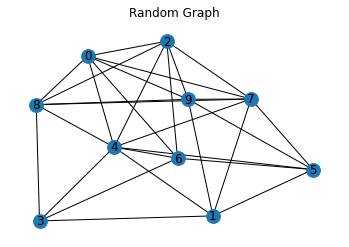

In [7]:
n = 10
p = 0.5
G, M = RandomGraph(n, p)
G = VisualizeGraph(G, "Random Graph")

## You can start from here.

Implement all your codes and write all your comments below this cell. 

For the algorithm; you are only allowed to use networkx to compute <b>modularity, connected components and betwenness centralities.</b> You need to implement Girvan-Nerman and rest of the algorithm by yourself. 

#### 1. Read and visualize the given graph adjacency matrix files. Give brief comments about the networks' hiearchy and modularity (20p)

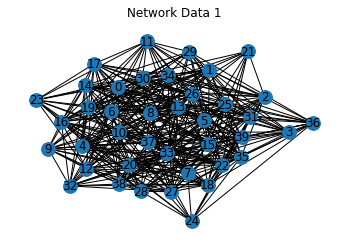

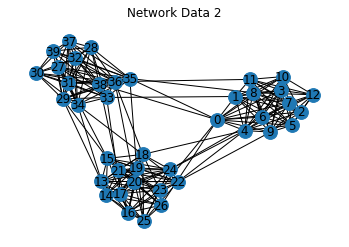

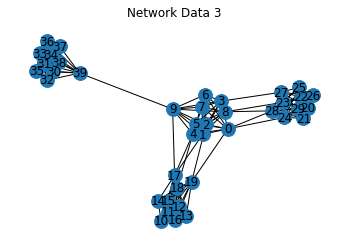

In [9]:
networkdata1 = np.load("NetworkData1.npy")
networkdata2 = np.load("NetworkData2.npy")
networkdata3 = np.load("NetworkData3.npy")


graph_1 = nx.from_numpy_matrix(networkdata1,parallel_edges=True)
graph_2 = nx.from_numpy_matrix(networkdata2,parallel_edges=True)
graph_3 = nx.from_numpy_matrix(networkdata3,parallel_edges=True)

l1 = VisualizeGraph(graph_1, "Network Data 1")
l2 = VisualizeGraph(graph_2, "Network Data 2")
l3 = VisualizeGraph(graph_3, "Network Data 3")

Graph 1 all nodes connected densely. However, there are densely connected subgroups called modules or communities in the Graph 2 and Graph 3. It can be seen in the Graph 3 that nodes in the modules are strongly connected to the each other but modules are weakly connected. Also, this can cause small number of characteristic path length.

Graph 1 seems non-modular graph at first. However, we should check with the algorithm to see the result. We may find the community for Graph 1 by removing the edges. 

Graph 2 and Graph 3 seems modular graphs. Also, it means that there will be some communities when we implement the Girvan-Newman algorithm for Graph 2 and Graph 3. 

#### 2. Implement the Girvan-Newman algorithm: Write a function that uses Girvan-Newman algorithm to find the number of connected components that gives the highest modularity. In the same function or another function, return the new graph with the number of connected components you have found (basically, remove edges until the number of connected components are equal to the one you found with your algorithm). (60p)

In [10]:
def calculateModularity(graph, graph_c):
    return nx_comm.modularity(graph, list(nx.connected_components(graph_c)))

def GirvanNewmanAlgo(graph):
    graph_c = graph.copy()

    modularity = calculateModularity(graph, graph_c)
   
    while(len(list(nx.connected_components(graph_c))) != len(graph_c)):
        betwennes_cent = nx.edge_betweenness_centrality(graph_c)
        u,v = max(betwennes_cent, key=betwennes_cent.get)

        graph_c.remove_edge(u,v)
        modularity_c = calculateModularity(graph, graph_c)
        a = list(nx.connected_components(graph_c))
        if modularity_c > modularity:
            modularity = modularity_c
            cc_highest_modularity = list(nx.connected_components(graph_c))
            graph_highest_modularity = graph_c.copy()
    
    return cc_highest_modularity, graph_highest_modularity

#### 3. Apply the function on the given networks. Visualize the final results. Assign different colors to each node in the visualization. (10p)

In [11]:
connected_com_1, girvanNewman_1 = GirvanNewmanAlgo(graph_1)
connected_com_2, girvanNewman_2 = GirvanNewmanAlgo(graph_2)
connected_com_3, girvanNewman_3 = GirvanNewmanAlgo(graph_3)

def girvanNewmanVisualization(graph,cc,layout,axes=None,communities=False):
    val = [1.0 for i in range(len(graph.nodes()))]
    color_number_class = 10
    color_number = 0.1
    for i in cc:
        if len(i)>1:
            for j in i:
                if communities==False:
                    color_number_class += 1           
                val[j] = color_number_class
            color_number_class += 1

        else:
            val[list(i)[0]] = color_number
            color_number += 0.3
    nx.draw(graph, pos=layout, node_size= 190, 
            cmap=plt.get_cmap('tab20b'), node_color=val, ax=axes, with_labels=True, font_color='white')

Communities flag has been used to show communities on the graph. Each color shows the subgraph (connected component). If we want to show graph without coloring the same color subgraphs:

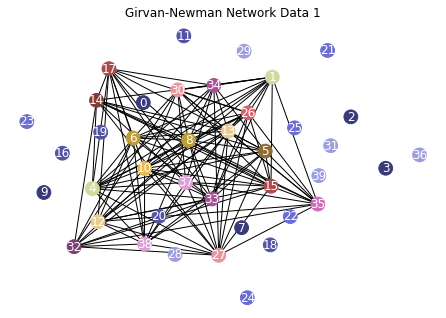

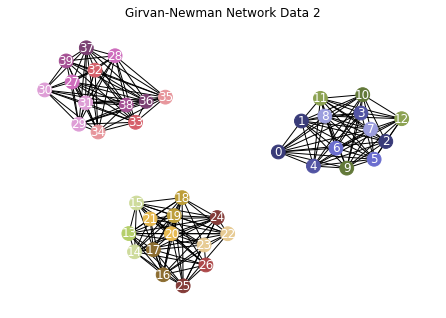

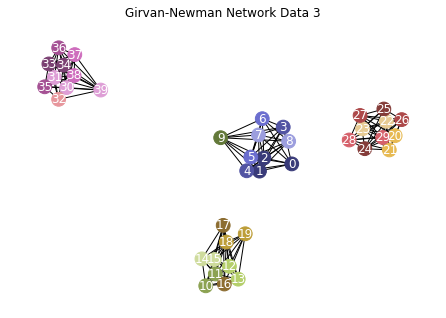

In [14]:
girvanNewmanVisualization(girvanNewman_1, connected_com_1, l1, communities=False)
plt.title("Girvan-Newman Network Data 1")
plt.show()
girvanNewmanVisualization(girvanNewman_2, connected_com_2, l2, communities=False)
plt.title("Girvan-Newman Network Data 2")
plt.show()
girvanNewmanVisualization(girvanNewman_3, connected_com_3, l3, communities=False)
plt.title("Girvan-Newman Network Data 3")
plt.show()

On the other hand, we can represent the communities (subgraphs) with a color. Thus, the communities can be seen more clearly.




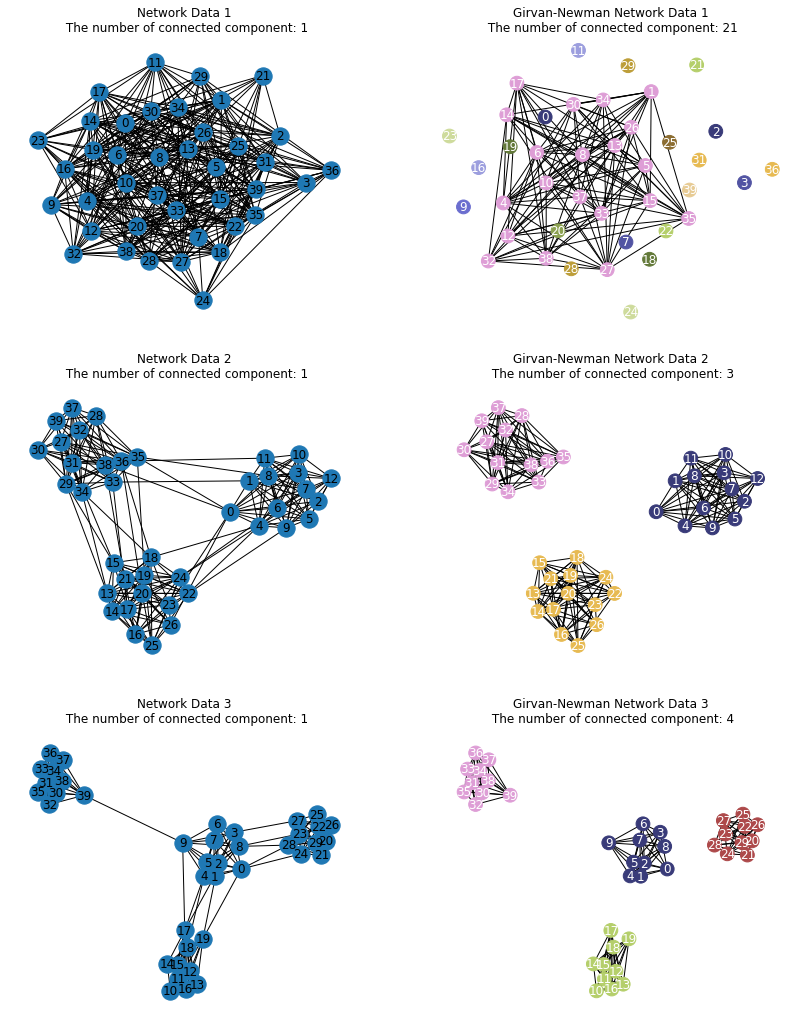

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,18))
ax = axes.flatten()
ax[0].title.set_text("Network Data 1\n The number of connected component: " + str(nx.number_connected_components(graph_1)))
ax[0].axis('off')
ax[1].title.set_text("Girvan-Newman Network Data 1\n The number of connected component: " + str(len(connected_com_1)))
nx.draw_networkx(graph_1, pos=l1, ax=ax[0])
girvanNewmanVisualization(girvanNewman_1, connected_com_1, l1, ax[1], communities=True)

ax[2].title.set_text("Network Data 2\n The number of connected component: " + str(nx.number_connected_components(graph_2)))
ax[2].axis('off')
ax[3].title.set_text("Girvan-Newman Network Data 2\n The number of connected component: " + str(len(connected_com_2)))
nx.draw_networkx(graph_2, pos=l2, ax=ax[2])
girvanNewmanVisualization(girvanNewman_2, connected_com_2, l2, ax[3], communities=True)

ax[4].title.set_text("Network Data 3\n The number of connected component: " + str(nx.number_connected_components(graph_3)))
ax[4].axis('off')
ax[5].title.set_text("Girvan-Newman Network Data 3\n The number of connected component: " + str(len(connected_com_3)))
nx.draw_networkx(graph_3, pos=l3, ax=ax[4])
girvanNewmanVisualization(girvanNewman_3, connected_com_3, l3, ax[5], communities=True)
plt.show()

#### 4. What conclusions can you derive about the networks after you run the algorithm on them and visualize the final result? Give brief comments. (10p)

After implementing the Girvan-Newman algorithm for the graphs, it looks plain that there is one community for Graph 1 and there are 3 communities for Graph 2, 4 communities for Graph 3.
As stated before, it can be understood from the number of communities that Graph 2 and 3 have high modularity values.
Let's check their modularity values:


In [16]:
print("Girvan-Newman Network Data 1 Modularity Value --> {:.2f}".format(calculateModularity(graph_1, girvanNewman_1)))
print("Girvan-Newman Network Data 1 Modularity Value --> {:.2f}".format(calculateModularity(graph_2, girvanNewman_2)))
print("Girvan-Newman Network Data 1 Modularity Value --> {:.2f}".format(calculateModularity(graph_3, girvanNewman_3)))

Girvan-Newman Network Data 1 Modularity Value --> 0.02
Girvan-Newman Network Data 1 Modularity Value --> 0.57
Girvan-Newman Network Data 1 Modularity Value --> 0.68


It can be seen that the modularity of graph is increasing while subraph number are increasing. Graph 2 and Graph 3 have modules with high instrinsic connectivity and weaker extrinsic connectivity compared to the Graph 1.

Also, we can see that when we run the Girvan-Newman algorithm, some modules are appeared for Graph 1. Nevertheless, its modularity still low. 

In addition, we can say that Graph 2 and Graph 3 are good towards to failures or attacks. If there is a failure in the one node of a subgraph, the main graph can easily disconnect the connectivity with this subgraph. However, it is not easy for Graph 1 compared to the these two graphs.

#### 5. BONUS What are the key differences between Agglomerative Clustering and Divisive Clustering? Which one of these does the Girvan-Newman algorithm belong to? Explain.(3p)

Agglomerative methods cluster well core nodes of modules with strong pairwise similarity. However, they fail to group together peripheral community members with only weak similarity to the rest of the group.

If we think the graph nodes connectivity as a tree, the Divisive method can be represented as from top to down. In contrast, agglomerative clustering method is bottom to up.

Girvan-Newman algorithm belongs to Hierarchical **Divisive Clustering** according to betweenness.